## Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Importing Data

In [3]:
path = r'E:\Achievement 4\08-2020 Instacart Basket Analysis'

In [4]:
path

'E:\\Achievement 4\\08-2020 Instacart Basket Analysis'

In [5]:
instacart = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

## Addressing PII (personally identifiable information)

In [6]:
instacart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 34 columns):
 #   Column                      Dtype   
---  ------                      -----   
 0   product_id                  int64   
 1   product_name                object  
 2   aisle_id                    int64   
 3   department_id               int64   
 4   prices                      float64 
 5   order_id                    object  
 6   user_id                     object  
 7   eval_set                    object  
 8   order_number                int64   
 9   orders_day_of_week          int64   
 10  order_hour_of_day           int64   
 11  days_since_last_order       float64 
 12  add_to_cart_order           int64   
 13  reordered                   int64   
 14  price_range_loc             object  
 15  busiest_day                 object  
 16  busiest_days                object  
 17  busiest_period_of_day       object  
 18  max_order                   int64   
 19

In [7]:
#Dropping first name and surname columms
instacart = instacart.drop(columns=['first_name','surname','_merge'])

## Comparing customer behavior in different geographic areas

### #Viewing all states in the 'state' column

In [8]:
instacart['state'].unique()

array(['Minnesota', 'Vermont', 'Wisconsin', 'Hawaii',
       'District of Columbia', 'Tennessee', 'Oregon', 'Alaska', 'Alabama',
       'Indiana', 'Florida', 'Kansas', 'North Carolina', 'Utah', 'Maine',
       'North Dakota', 'South Dakota', 'Delaware', 'Illinois', 'Wyoming',
       'Maryland', 'Louisiana', 'New Jersey', 'Georgia', 'Arkansas',
       'California', 'Idaho', 'New Hampshire', 'West Virginia', 'Nevada',
       'New Mexico', 'New York', 'Rhode Island', 'Nebraska',
       'Massachusetts', 'Texas', 'Pennsylvania', 'Iowa', 'Kentucky',
       'Michigan', 'Ohio', 'Oklahoma', 'Arizona', 'Washington',
       'Virginia', 'Connecticut', 'Mississippi', 'Colorado', 'Montana',
       'Missouri', 'South Carolina'], dtype=object)

### #Creating a new column for 'region'

In [9]:
#Creating a state-to-region map
state_to_region = {'Maine':'Northeast', 'New Hampshire':'Northeast', 'Vermont':'Northeast', 'Massachusetts':'Northeast', 'Rhode Island':'Northeast', 'Connecticut':'Northeast', 'New York':'Northeast', 'Pennsylvania':'Northeast', 'New Jersey':'Northeast', 'Wisconsin':'Midwest', 'Michigan':'Midwest', 'Illinois':'Midwest', 'Indiana':'Midwest', 'Ohio':'Midwest', 'North Dakota':'Midwest', 'South Dakota':'Midwest', 'Nebraska':'Midwest', 'Kansas':'Midwest', 'Minnesota':'Midwest', 'Iowa':'Midwest', 'Missouri':'Midwest', 'Delaware':'South', 'Maryland':'South', 'District of Columbia':'South', 'Virginia':'South', 'West Virginia':'South', 'North Carolina':'South', 'South Carolina':'South', 'Georgia':'South', 'Florida':'South', 'Kentucky':'South', 'Tennessee':'South', 'Mississippi':'South', 'Alabama':'South', 'Oklahoma':'South', 'Texas':'South', 'Arkansas':'South', 'Louisiana':'South', 'Idaho':'West', 'Montana':'West', 'Wyoming':'West', 'Nevada':'West', 'Utah':'West', 'Colorado':'West', 'Arizona':'West', 'New Mexico':'West', 'Alaska':'West', 'Washington':'West', 'Oregon':'West', 'California':'West', 'Hawaii':'West'}

In [10]:
instacart['region'] = instacart['state'].map(state_to_region)

In [11]:
print(instacart[['state', 'region']])

                  state     region
0             Minnesota    Midwest
1             Minnesota    Midwest
2               Vermont  Northeast
3             Wisconsin    Midwest
4             Wisconsin    Midwest
...                 ...        ...
32404854   Rhode Island  Northeast
32404855  West Virginia      South
32404856       Michigan    Midwest
32404857       Michigan    Midwest
32404858   Pennsylvania  Northeast

[32404859 rows x 2 columns]


In [12]:
# Check for any missing regions
missing_regions = instacart[instacart['region'].isna()]['state'].unique()

In [13]:
print("states with missing regions:", missing_regions)

states with missing regions: []


All states are assigned to a region.

### #Determining whether theres a difference between spending habits betweeen the different U.S. regions

In [14]:
# Create spending_flag column using loc() function
instacart.loc[instacart['mean_product_price'] >= 10, 'spending_flag'] = 'High spender'

In [15]:
instacart.loc[instacart['mean_product_price'] < 10, 'spending_flag'] = 'Low spender'

In [16]:
regional_spending = pd.crosstab(instacart['region'], instacart['spending_flag'], dropna = False)

In [17]:
regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


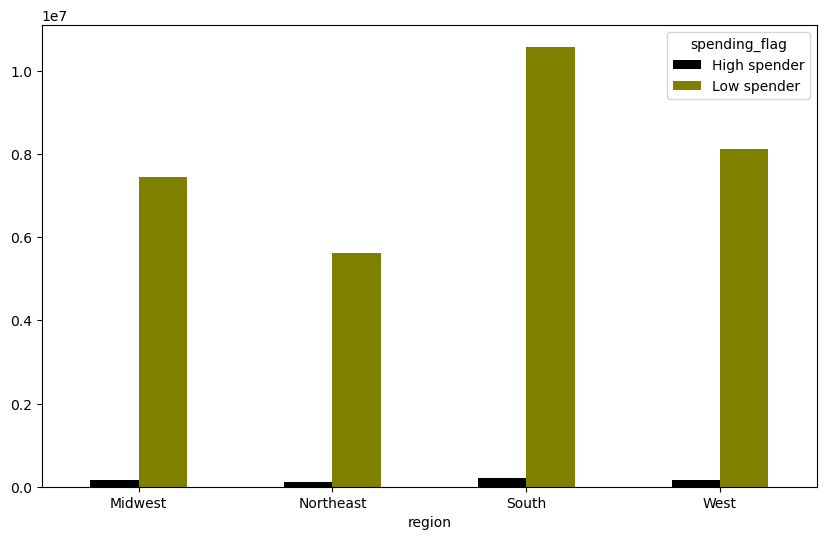

In [18]:
#Create bar chart showing the difference in spending habits
spending_by_region = regional_spending.plot.bar(color = ['black', 'olive'], figsize=(10, 6))
plt.xticks(rotation=0) 
plt.show()

In [19]:
#Export the bar chart
spending_by_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spendingflag_barchart.png'))

## Excluding low-activity customers

In [20]:
#Create a function determining low and high activity customers
result = []

for value in instacart['max_order']:
    if value < 5:
        result.append('low-activity customer')
    else: 
        result.append('high-activity customer')

In [21]:
#Add result as a new column to the dataframe
instacart['activity_status'] = result

In [22]:
# count number of each activity level
instacart['activity_status'].value_counts()

activity_status
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [23]:
#Exclude customers with less than 5 orders
instacart_high_activity = instacart[instacart['activity_status'] != 'low-activity customer']

In [24]:
#Export data
instacart_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'lowactivitycust_excluded.pkl'))

## Customer Profiling

### Creating a profiling variable based on age, and number of dependents


In [25]:
# Initialize the new profile column with a default value
instacart_high_activity['customer_profile'] = 'Unknown'

C:\Users\ariel\AppData\Local\Temp\ipykernel_13240\2871420081.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  instacart_high_activity['customer_profile'] = 'Unknown'


In [26]:
# Young Adult no dependents
instacart_high_activity.loc[
    (instacart_high_activity['age'] < 30) & 
    (instacart_high_activity['n_dependants'] == 0), 
    'customer_profile'] = 'Young Adult no dependents'

In [27]:
#Adult over 30 no dependents
instacart_high_activity.loc[
    (instacart_high_activity['age'] >= 30) & 
    (instacart_high_activity['n_dependants'] == 0), 
    'customer_profile'] = 'Adult no dependents'

In [28]:
# Young Adult with Dependents
instacart_high_activity.loc[
    (instacart_high_activity['age'] < 30) & 
    (instacart_high_activity['n_dependants'] > 0), 
    'customer_profile'] = 'Young Adult with Dependents'

In [29]:
# Adult over 30 with Dependents
instacart_high_activity.loc[
    (instacart_high_activity['age'] >= 30) & 
    (instacart_high_activity['n_dependants'] > 0), 
    'customer_profile'] = 'Adult with Dependents'

### Income distribution by customer profile

In [30]:
# Verify the changes
print(instacart_high_activity['customer_profile'].value_counts())

customer_profile
Adult with Dependents          18854898
Adult no dependents             6292063
Young Adult with Dependents     4369985
Young Adult no dependents       1447618
Name: count, dtype: int64


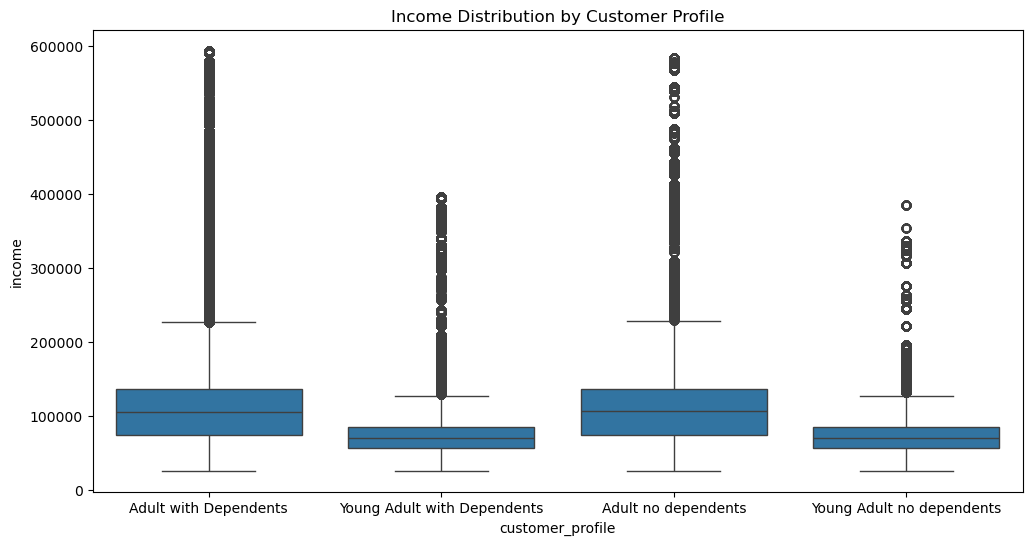

In [31]:
plt.figure(figsize=(12, 6)) 
cust_profileincome = sns.boxplot(data=instacart_high_activity, x='customer_profile', y='income')
plt.yticks(rotation=0)
plt.title('Income Distribution by Customer Profile')
plt.show()

In [32]:
#Export box plot
cust_profileincome.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_profileincome.png'))

### Include department ID frequency in profiling

In [33]:
# Count occurrences of each department_id within each customer_profile
department_freq_by_profile = instacart_high_activity.groupby(['customer_profile', 'department_id']).size().reset_index(name='department_freq')

In [34]:
# Check the resulting DataFrame
print(department_freq_by_profile.head())

      customer_profile  department_id  department_freq
0  Adult no dependents              1           432680
1  Adult no dependents              2             7064
2  Adult no dependents              3           229152
3  Adult no dependents              4          1850324
4  Adult no dependents              5            30424


In [35]:
# Find the department_id with the maximum frequency within each customer_profile
most_purchased_department = department_freq_by_profile.loc[
    department_freq_by_profile.groupby('customer_profile')['department_freq'].idxmax()]

In [36]:
# Display the results
print(most_purchased_department)

               customer_profile  department_id  department_freq
3           Adult no dependents              4          1850324
24        Adult with Dependents              4          5529518
45    Young Adult no dependents              4           425117
66  Young Adult with Dependents              4          1274314


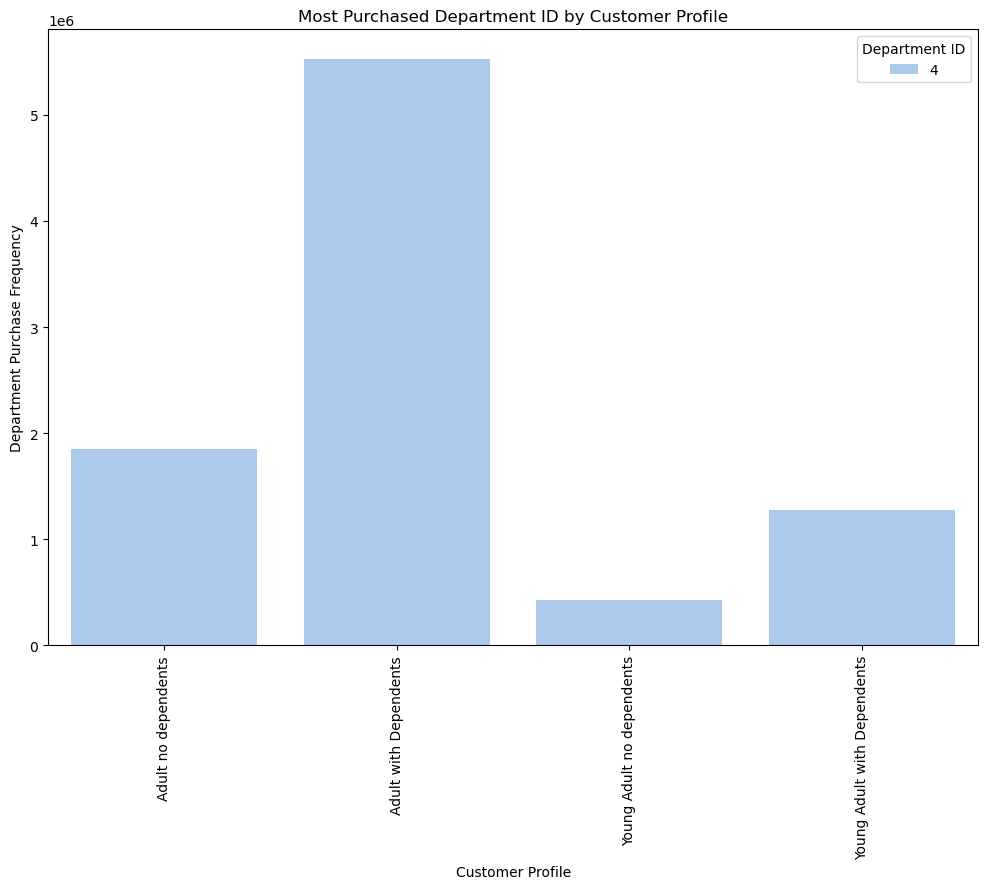

In [37]:
# Plot the most purchased department_id for each customer profile
most_purchased_dep = plt.figure(figsize=(12, 8))
sns.barplot(data=most_purchased_department, x='customer_profile', y='department_freq', hue='department_id', palette='pastel', dodge=False)
plt.xticks(rotation=90)
plt.title('Most Purchased Department ID by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Department Purchase Frequency')
plt.legend(title='Department ID')
plt.show()

Department ID 4 = Produce

In [38]:
#Export bar chart
most_purchased_dep.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'mostpurchased_dep.png'))

## Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [39]:
instacart_high_activity.columns.to_list()

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'eval_set',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_last_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'mean_product_price',
 'spending_flag',
 'median_days_between_orders',
 'order_frequency',
 'gender',
 'state',
 'age',
 'date_joined',
 'n_dependants',
 'marital_status',
 'income',
 'region',
 'activity_status',
 'customer_profile']

In [40]:
#Creating a subset data of useful columns
agg_cust_profile = instacart_high_activity.groupby(['user_id', 'gender', 'state', 'n_dependants', 'marital_status', 'order_number', 'orders_day_of_week', 'order_hour_of_day', 'loyalty_flag', 'age', 'income', 'department_id', 'region', 'activity_status', 'spending_flag', 'customer_profile'])['prices'].sum().reset_index()

In [41]:
#Finding the max, min, and mean of 'order number', 'orders day of week', and 'order hour of day' for usage frequency and expenditure
agg_custprofile = agg_cust_profile.groupby('user_id').agg({'order_number': ['max', 'min', 'mean'], 'orders_day_of_week': ['max', 'min', 'mean'], 
                                                    'order_hour_of_day': ['max', 'min', 'mean'], 'prices': ['max', 'min', 'mean']})

In [42]:
agg_custprofile

order_number                orders_day_of_week                \
                 max min       mean                max min      mean   
user_id                                                                
1                 10   1   5.324324                  4   1  2.594595   
10                 5   1   3.153846                  5   2  4.038462   
100                5   1   3.411765                  5   0  2.235294   
1000               7   1   4.157895                  6   0  2.394737   
10000             72   1  36.376321                  6   0  2.503171   
...              ...  ..        ...                ...  ..       ...   
99994             11   1   5.653333                  6   0  4.866667   
99995              5   1   3.346154                  6   0  3.384615   
99996             12   1   5.803571                  5   1  2.196429   
99998              5   1   3.500000                  6   1  2.000000   
99999             34   1  16.980132                  6   0  2.496689   

        order_hour_of_day                prices                  
                      max min       mean    max  min       mean  
user_id                                                          
1                      16   7  10.135135   32.0  1.0  10.154054  
10                     20  14  16.846154  194.3  1.2  47.580769  
100                    20  15  17.764706   39.5  4.6  15.658824  
1000                   18  14  16.368421   69.1  2.3  22.789474  
10000                  22   5  11.369979  107.0  1.2  18.574207  
...                   ...  ..        ...    ...  ...        ...  
99994                  20   7  11.120000  113.7  1.5  18.597333  
99995                  19  12  13.538462   41.1  1.2  15.303846  
99996                  13   8  10.410714   74.5  1.1  16.939286  
99998                  17   9  11.600000   51.2  6.8  19.010000  
99999                  23   7  14.384106   82.2  1.2  15.883444  

[162631 rows x 12 columns]

## Comparing customer profiles with regions and departments

In [43]:
#Importing departments dataframe
df_dept = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col=False)

In [44]:
df_dept

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [45]:
df_dept.rename(columns = {'Unnamed: 0': 'department_id'}, inplace = True)

In [46]:
df_dept

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [47]:
df_dept.dtypes

department_id     int64
department       object
dtype: object

In [48]:
# Changing department_id from int64 to str for merge
df_dept['department_id'] = df_dept['department_id'].astype('float64')

In [49]:
# Merging departments data set with agg customer profile data set
instacart_dep = pd.merge(agg_cust_profile, df_dept, on='department_id', how='left', indicator=True)

In [50]:
instacart_dep.head()

,user_id,gender,state,n_dependants,marital_status,order_number,orders_day_of_week,order_hour_of_day,loyalty_flag,age,income,department_id,region,activity_status,spending_flag,customer_profile,prices,department,_merge
0,1,Female,Alabama,3,married,1,2,8,New customer,31,40423,7,South,high-activity customer,Low spender,Adult with Dependents,9.0,beverages,both
1,1,Female,Alabama,3,married,1,2,8,New customer,31,40423,16,South,high-activity customer,Low spender,Adult with Dependents,12.5,dairy eggs,both
2,1,Female,Alabama,3,married,1,2,8,New customer,31,40423,17,South,high-activity customer,Low spender,Adult with Dependents,1.0,household,both
3,1,Female,Alabama,3,married,1,2,8,New customer,31,40423,19,South,high-activity customer,Low spender,Adult with Dependents,9.1,snacks,both
4,1,Female,Alabama,3,married,2,3,7,New customer,31,40423,4,South,high-activity customer,Low spender,Adult with Dependents,10.3,produce,both


In [53]:
# Aggregate data by region
region_summary = instacart_dep.groupby('region').agg({
    'order_number': 'mean',
    'prices': 'mean'
}).reset_index()

In [54]:
# Rename columns for clarity
region_summary.rename(columns={
    'order_number': 'avg_order_number',
    'prices': 'avg_prices'
}, inplace=True)

C:\Users\ariel\AppData\Local\Temp\ipykernel_13240\118743619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='avg_order_number', data=region_summary, palette='viridis')


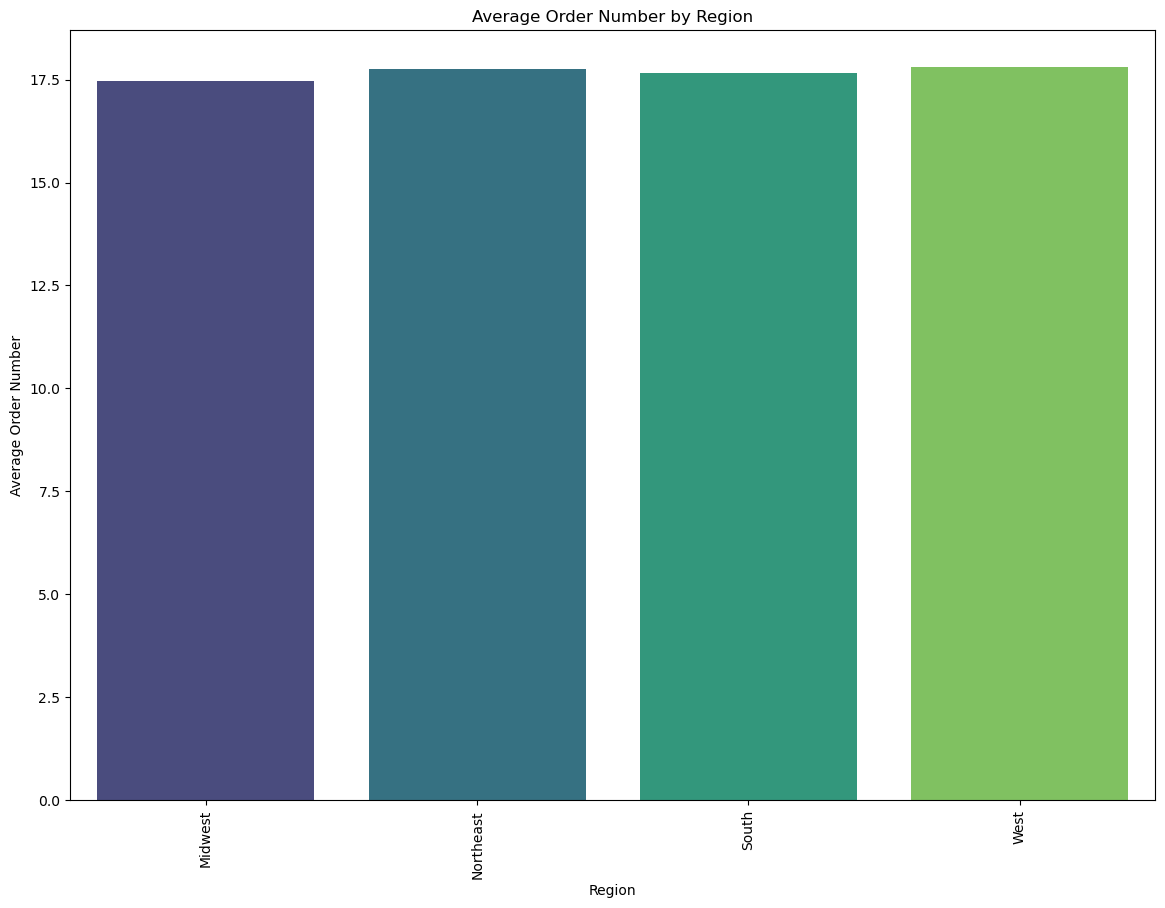

In [57]:
# Plot average order number by region
bar201 = plt.figure(figsize=(14, 10))
sns.barplot(x='region', y='avg_order_number', data=region_summary, palette='viridis')
plt.title('Average Order Number by Region')
plt.xlabel('Region')
plt.ylabel('Average Order Number')
plt.xticks(rotation=90)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'average_order_number_by_region.png'))
plt.show()


In [58]:
# Export bar chart 
bar201.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_order_numberbyregion.png'))

C:\Users\ariel\AppData\Local\Temp\ipykernel_13240\3212158804.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='avg_prices', data=region_summary, palette='plasma')


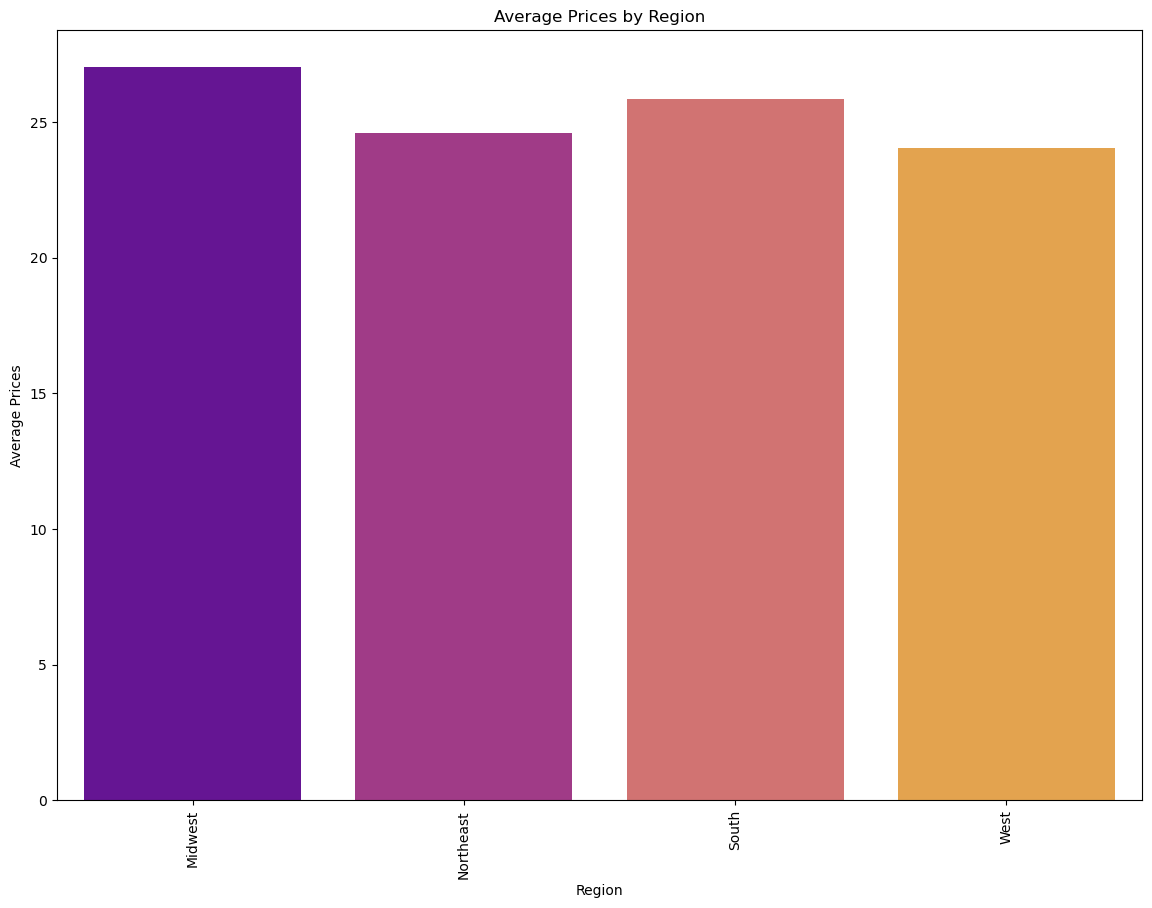

In [59]:
# Plot average prices by region
bar111 = plt.figure(figsize=(14, 10))
sns.barplot(x='region', y='avg_prices', data=region_summary, palette='plasma')
plt.title('Average Prices by Region')
plt.xlabel('Region')
plt.ylabel('Average Prices')
plt.xticks(rotation=90)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'average_prices_by_region.png'))
plt.show()

In [60]:
bar111.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'avg_prices_byregion.png'))

In [61]:
# Aggregate spending data by region and department
region_department_spending = instacart_dep.groupby(['region', 'department']).agg({
    'prices': 'mean'  # or 'sum' depending on whether you want total or average spending
}).reset_index()

In [62]:
# Rename columns for clarity
region_department_spending.rename(columns={
    'prices': 'avg_spending'
}, inplace=True)

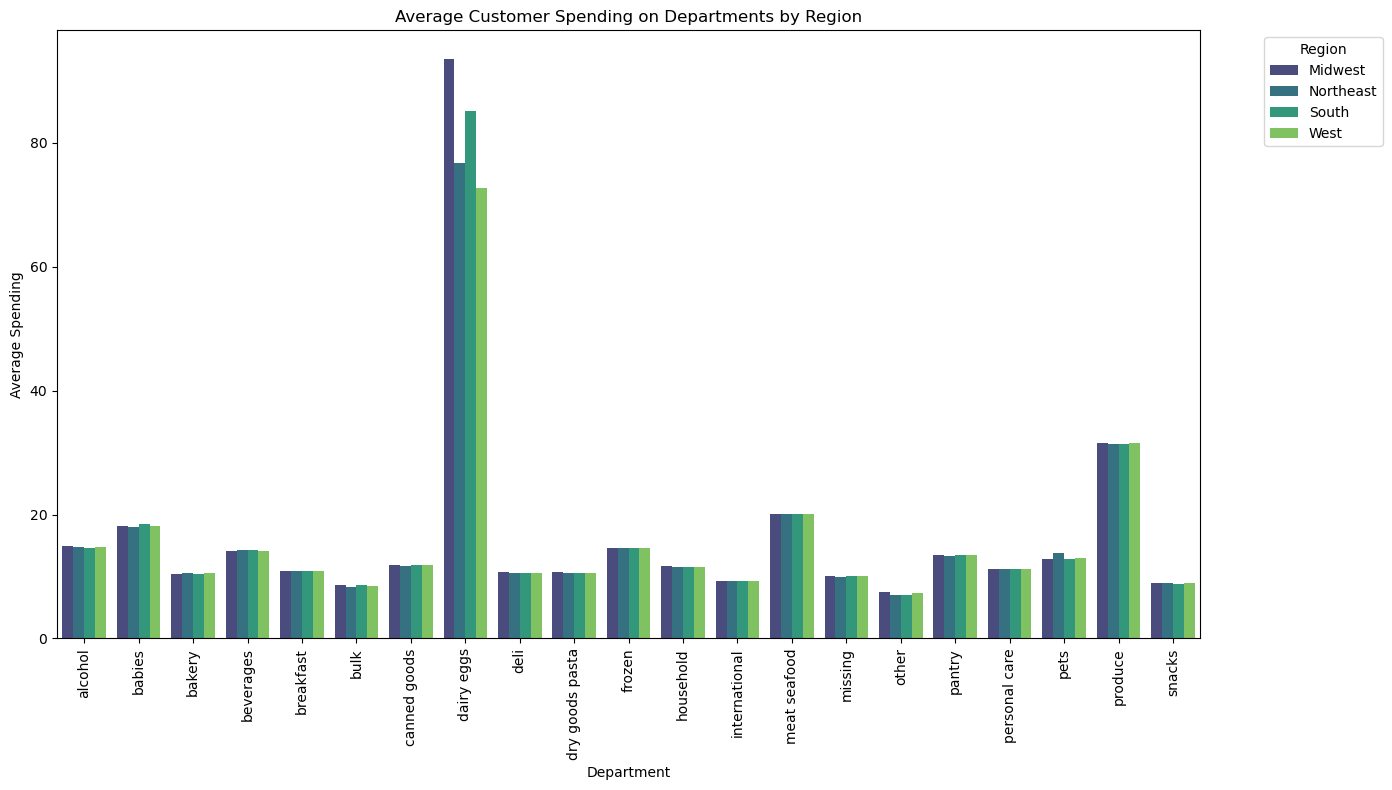

In [63]:
# Plot average spending by department and region
plt.figure(figsize=(14, 8))
sns.barplot(x='department', y='avg_spending', hue='region', data=region_department_spending, palette='viridis')
plt.title('Average Customer Spending on Departments by Region')
plt.xlabel('Department')
plt.ylabel('Average Spending')
plt.xticks(rotation=90)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'average_spending_by_department_and_region.png'))
plt.show()

## Additional Visualizations for Analysis

In [64]:
#Reviewing data subsets and columns
instacart_high_activity.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', 'region', 'activity_status',
       'customer_profile'],
      dtype='object')

In [65]:
instacart_dep.columns

Index(['user_id', 'gender', 'state', 'n_dependants', 'marital_status',
       'order_number', 'orders_day_of_week', 'order_hour_of_day',
       'loyalty_flag', 'age', 'income', 'department_id', 'region',
       'activity_status', 'spending_flag', 'customer_profile', 'prices',
       'department', '_merge'],
      dtype='object')

In [66]:
# Aggregating data to compute average spending
avg_spending = instacart_high_activity.groupby('order_hour_of_day')['prices'].mean()

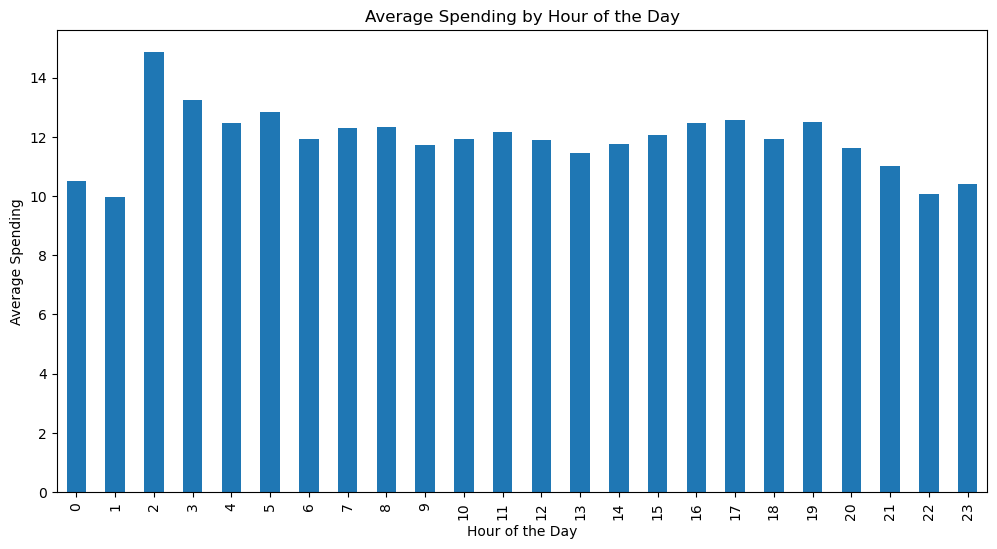

In [67]:
# Creating bar plot
plt.figure(figsize=(12, 6))
avg_spending.plot(kind='bar')
plt.title('Average Spending by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Spending')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'busiest_hoursofday.png'))
plt.show()

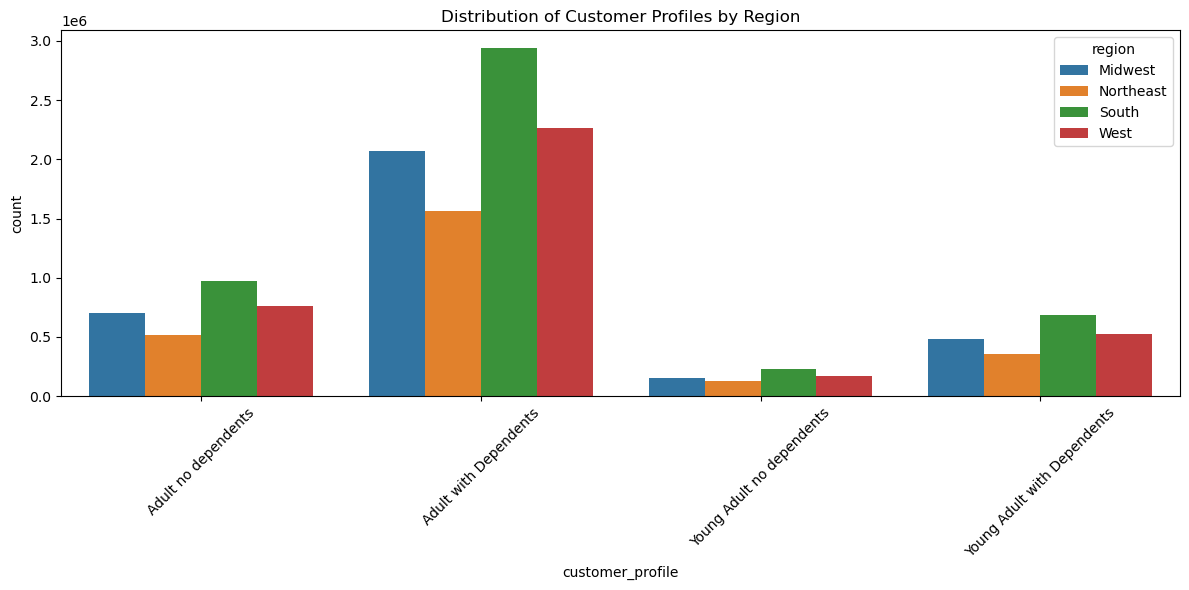

In [68]:
# Analysis: Distribution of Customer Profiles by Region
profile_region_df = instacart_dep.groupby(['customer_profile', 'region']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_profile', y='count', hue='region', data=profile_region_df)
plt.title('Distribution of Customer Profiles by Region')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution_of_customer_by_region.png'))
plt.show()

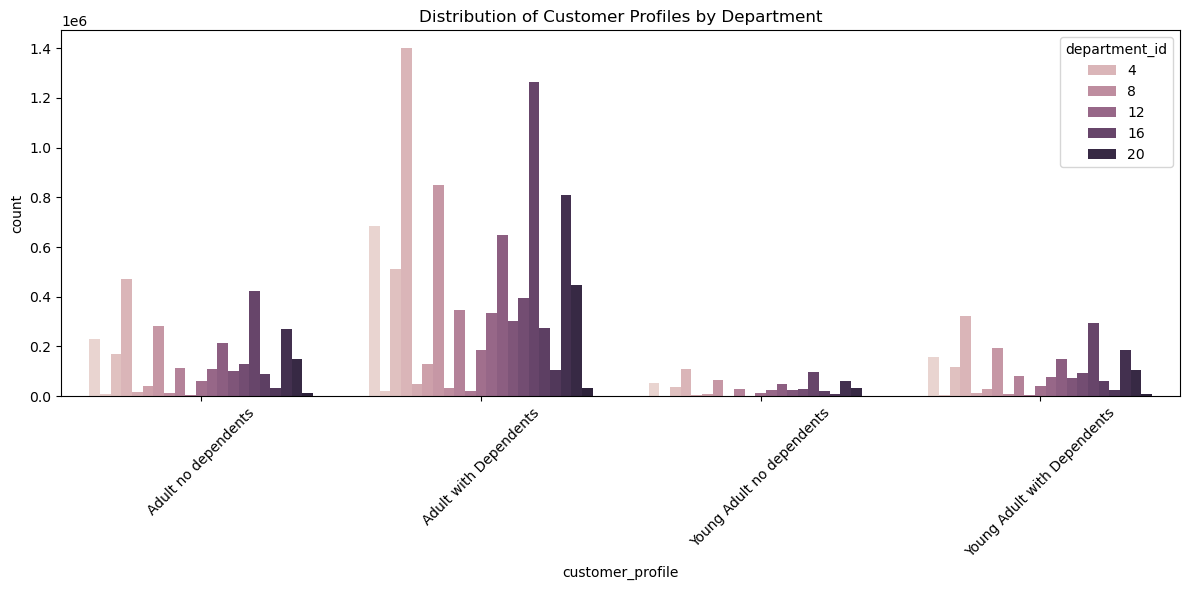

In [69]:
# Analysis: Distribution of Customer Profiles by Department
profile_dept_df = instacart_dep.groupby(['customer_profile', 'department_id']).size().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_profile', y='count', hue='department_id', data=profile_dept_df)
plt.title('Distribution of Customer Profiles by Department')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'profile_department_distribution.png'))
plt.show()

In [70]:
df_dept

,department_id,department
0,1.0,frozen
1,2.0,other
2,3.0,bakery
3,4.0,produce
4,5.0,alcohol
5,6.0,international
6,7.0,beverages
7,8.0,pets
8,9.0,dry goods pasta
9,10.0,bulk


Department ID 4 = produce

8 = pets

12 = meat seafood

16 = dairy eggs

20 = deli

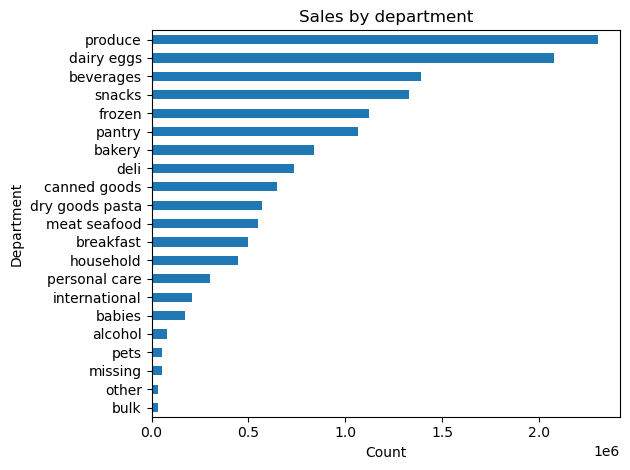

In [71]:
# Creating department bar graph
dept_bar = instacart_dep['department'].value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title('Sales by department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.tight_layout()

In [72]:
dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept.png'))

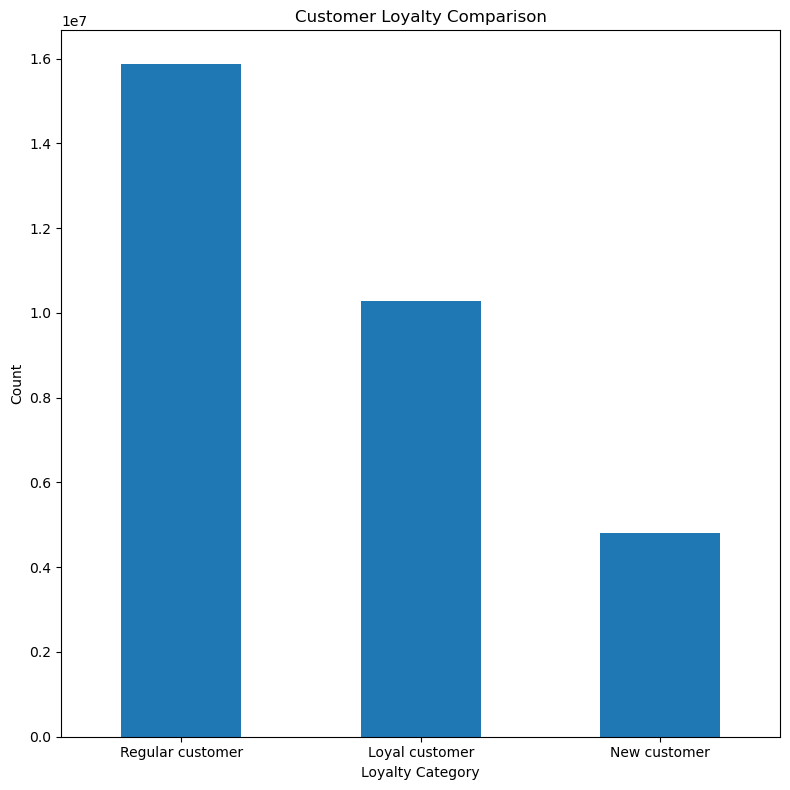

In [73]:
# Creating bar graph for customer loyalty breakdown
loyal = plt.figure(figsize = (8,8))
loyalty_customer_comparison_bar = instacart_high_activity['loyalty_flag'].value_counts().plot(kind = 'bar', rot = 0)
plt.title('Customer Loyalty Comparison')
plt.xlabel('Loyalty Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [74]:
loyal.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_flag_dist.png'))

In [75]:
user_orders = instacart_high_activity.groupby('user_id').agg({
    'order_id': 'count',
    'days_since_last_order': 'mean',
    'loyalty_flag': 'first'  
}).reset_index()

In [76]:
# Rename columns for clarity
user_orders.columns = ['user_id', 'total_orders', 'avg_days_since_last_order', 'loyalty_flag']

In [77]:
# Analyze loyalty distribution
loyalty_distribution = user_orders['loyalty_flag'].value_counts()

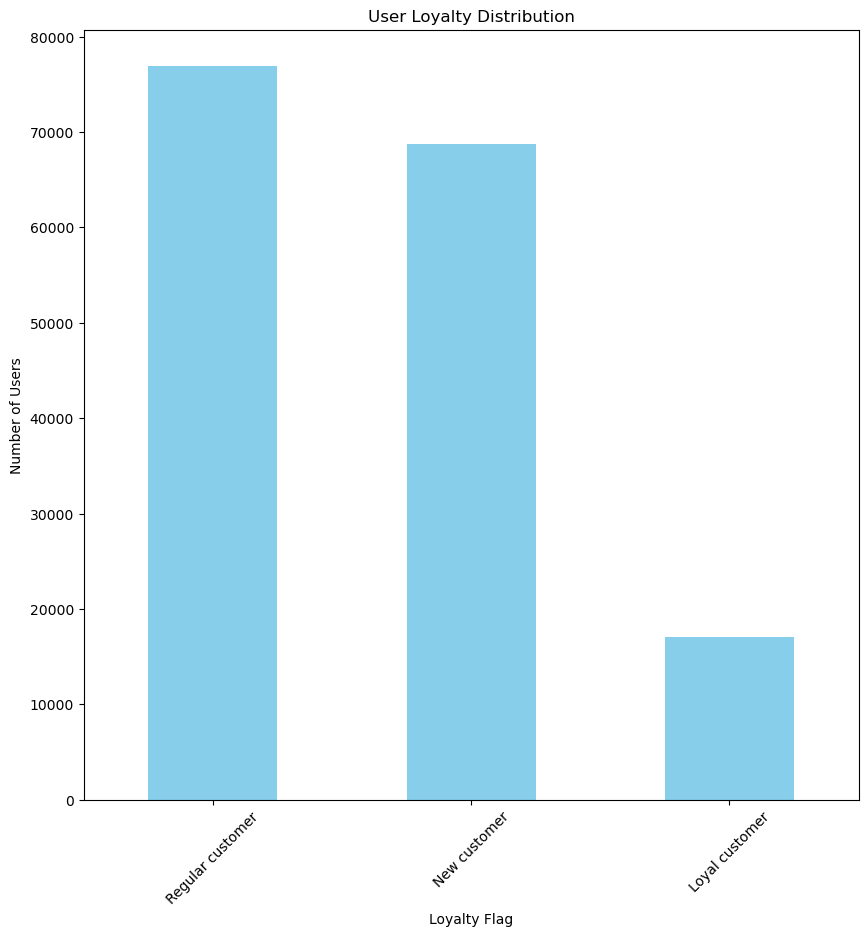

In [78]:
# Visualize the loyalty distribution
bar233 = plt.figure(figsize=(10, 10))
loyalty_distribution.plot(kind='bar', color='skyblue')
plt.title('User Loyalty Distribution')
plt.xlabel('Loyalty Flag')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()

In [79]:
bar233.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_number.png'))

In [80]:
# Additional analysis: Average days since last order by loyalty flag
avg_days_by_loyalty = user_orders.groupby('loyalty_flag')['avg_days_since_last_order'].mean().sort_index()

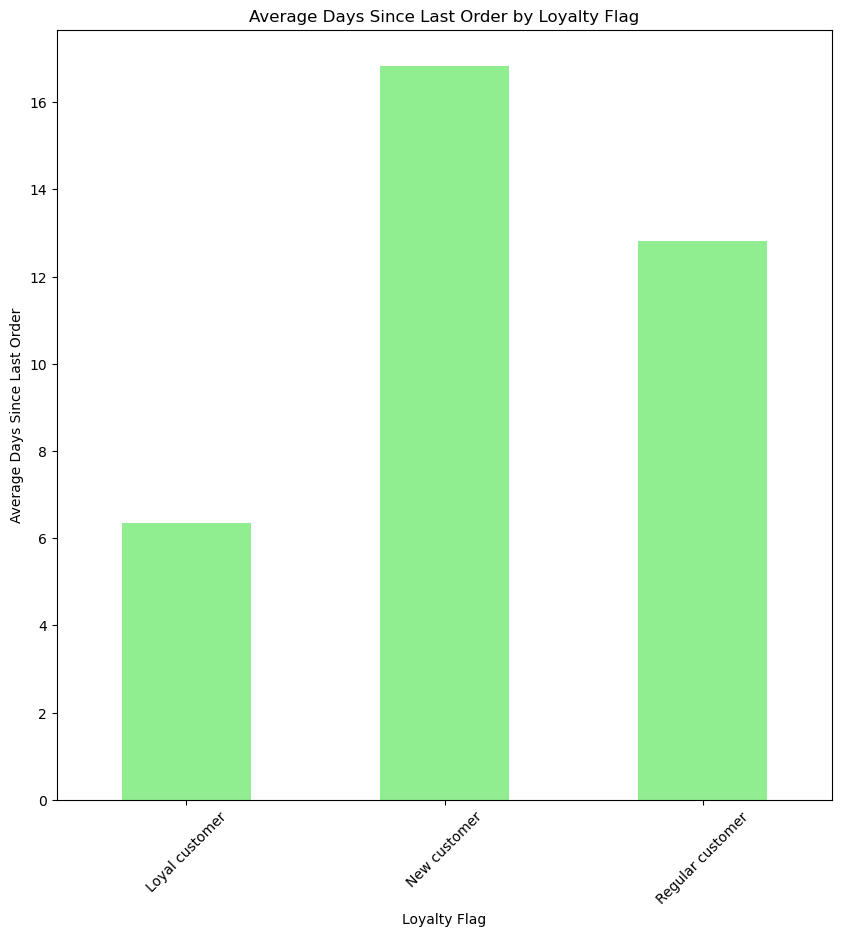

In [81]:
# Visualize average days since last order by loyalty flag
bar101 = plt.figure(figsize=(10, 10))
avg_days_by_loyalty.plot(kind='bar', color='lightgreen')
plt.title('Average Days Since Last Order by Loyalty Flag')
plt.xlabel('Loyalty Flag')
plt.ylabel('Average Days Since Last Order')
plt.xticks(rotation=45)
plt.show()

In [82]:
bar101.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_avg_days.png'))

In [83]:
# Finding connection between family status, age, and ordering behavior
agg_data2 = instacart_high_activity.groupby(['age', 'marital_status']).agg({
    'order_id': 'count',  # Count of orders
}).reset_index()

In [84]:
agg_data2.rename(columns={'order_id': 'order_count'}, inplace=True)

C:\Users\ariel\AppData\Local\Temp\ipykernel_13240\286690793.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar503 = sns.barplot(data=agg_data2, x='age', y='order_count', hue='marital_status', ci=None)


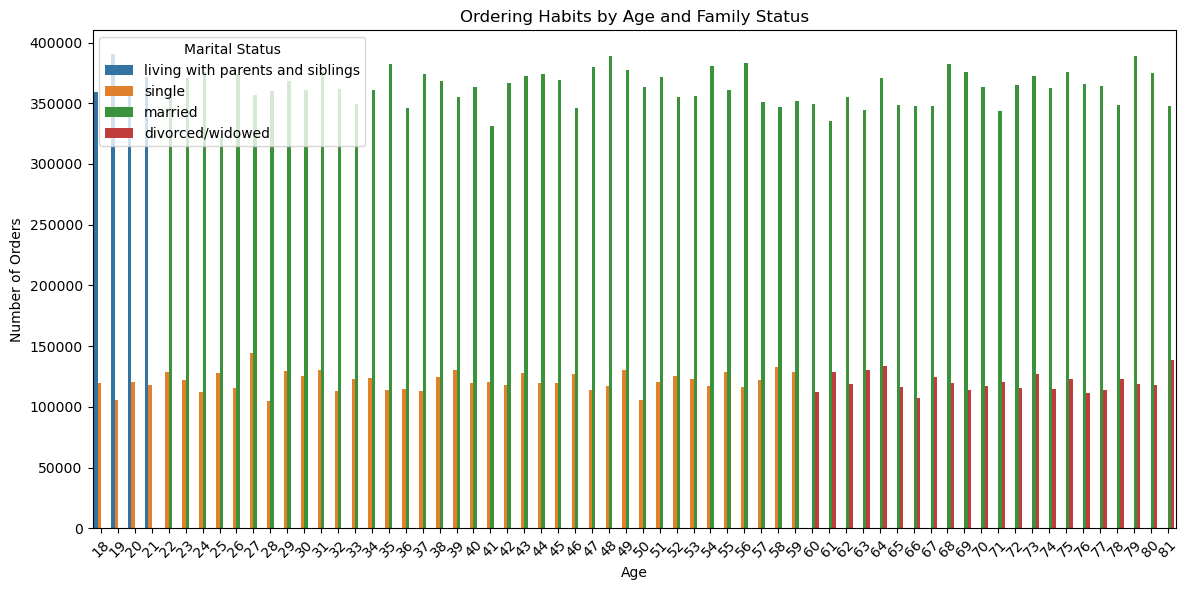

In [85]:
# Visualization
plt.figure(figsize=(12, 6))
bar503 = sns.barplot(data=agg_data2, x='age', y='order_count', hue='marital_status', ci=None)
plt.title('Ordering Habits by Age and Family Status')
plt.xlabel('Age')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.tight_layout()

In [86]:
bar503.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_fam_orders.png'))

In [87]:
# Aggregate total spending by customer profile
spending_by_profile = instacart_high_activity.groupby('customer_profile')['prices'].sum().reset_index()

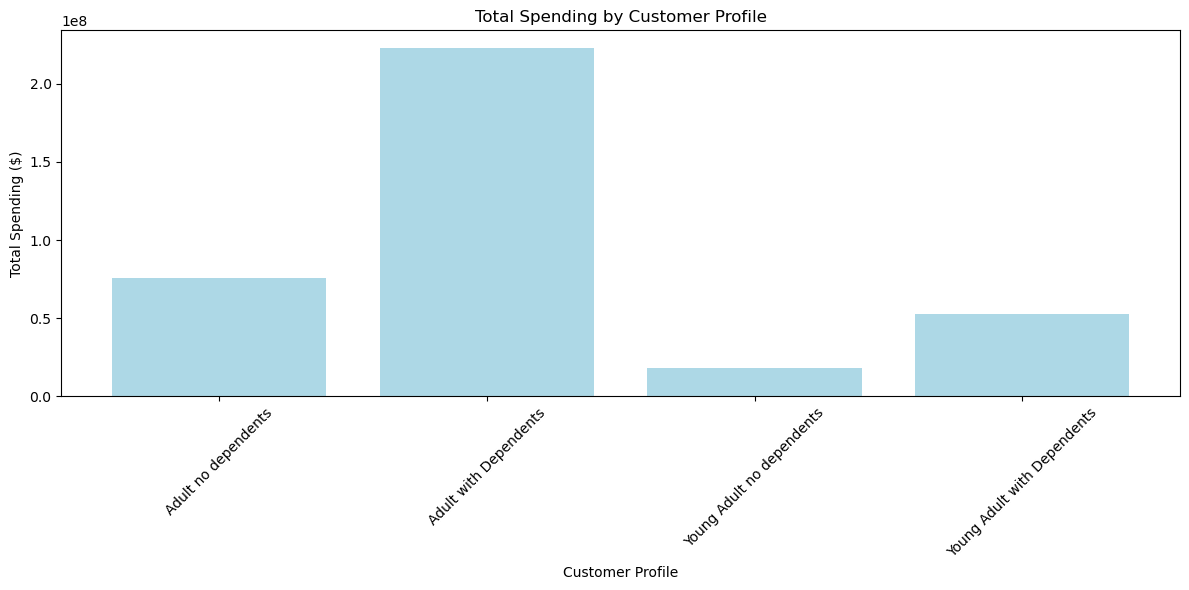

In [88]:
bar600 = plt.figure(figsize=(12, 6))
plt.bar(spending_by_profile['customer_profile'], spending_by_profile['prices'], color='lightblue')
plt.title('Total Spending by Customer Profile')
plt.xlabel('Customer Profile')
plt.ylabel('Total Spending ($)')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

In [89]:
bar600.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'cust_spend.png'))

In [90]:
instacart_high_activity.columns

Index(['product_id', 'product_name', 'aisle_id', 'department_id', 'prices',
       'order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_last_order', 'add_to_cart_order',
       'reordered', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'marital_status', 'income', 'region', 'activity_status',
       'customer_profile'],
      dtype='object')

## Exporting final dataset

In [91]:
#Export dataframe to a pickle file
instacart_high_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))